# Data Analytics - Analyzing the S&P 500

In this document, we will take S&P 500 market data from 1950-2018, and try to discover some interesting information from it.
We'll start off by presenting the questions, and then working to find solutions. In this tutorial, we will use our knowledge of data analytics (and a little bit of knowledge of statistics) to answer the following questions:

- What's the average return of the market?
- How much money should I expect to make at different lengths of investing?
- How long should I invest to guarentee returns?

In [17]:
#loading in the packages we'll use to analyze and visualize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sorting #file containing quick sort code

In [13]:
#we are creating a dataframe - or a table object - to organize our data from the .csv file
df = pd.read_csv("sp500.csv")

In [14]:
#first 5 columns
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/1950,16.66,16.66,16.66,16.66,16.66,1260000
1,1/4/1950,16.85,16.85,16.85,16.85,16.85,1890000
2,1/5/1950,16.93,16.93,16.93,16.93,16.93,2550000
3,1/6/1950,16.98,16.98,16.98,16.98,16.98,2010000
4,1/9/1950,17.08,17.08,17.08,17.08,17.08,2520000


In [15]:
#last 5 columns
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17250,7/24/2018,2820.679932,2829.989990,2811.120117,2820.399902,2820.399902,3417530000
17251,7/25/2018,2817.729980,2848.030029,2817.729980,2846.070068,2846.070068,3553010000
17252,7/26/2018,2835.489990,2845.570068,2835.260010,2837.439941,2837.439941,3653330000
17253,7/27/2018,2842.350098,2843.169922,2808.340088,2818.820068,2818.820068,3415710000
17254,7/30/2018,2819.000000,2821.739990,2798.110107,2802.600098,2802.600098,3245770000


In order to get the average return of the market, you can simply take the percentage gain from the last price and the first price and take the nth root of it, where n is the number of years difference.

avg return = (ΔP/P0)^(1/n)

In [43]:
sp500_first_info = df.iloc[:1] #gets the last row in the dataframe
sp500_price_start = float(sp500_first_info['Open']) #gets opening price of first recorded date

sp500_last_info = df.iloc[-1:] #gets the last row in the dataframe
sp500_price_end = float(sp500_last_info['Close']) #gets the closing price of last recorded date

sp500_return = round((((sp500_price_end - sp500_price_start) / sp500_price_start) ** (1/68) - 1)*100,2)
print("Annualized Return: %s%%\n" % sp500_return)

Annualized Return: 7.82%



Although this was easy to compute, it's not practical for us. This return is based off of buying on one specific day and selling on one specific day. What we need to do is find out the returns you should expect given different durations. So let's answer question number two: What is the expected return for different investment durations?

In [80]:
#For the sake of simplicity, lets just test durations of 1-30 years. We will continuously loops through the data recording all
#returns for the given duration and then get an average.

#Lets store this information in a dictionary first, and then make it a dataframe after.

prices = list(df['Close']) #save the prices into a list for easier access

sp500 = {}
sp500['Years']=[]
sp500['Avg ROI']=[]
sp500['Avg annual return']=[]

In [81]:
for years in range(1,31):
    count=0
    total=[] #list to store all returns for each given year
    
    x=252*years #there are 252 trading days in a year, so to get the price of the sp500 x years later,
                #multiply number of years by 252
        
    for i in range(len(prices)-x):
        
        count+=1 #holds the number of returns so we can divide later to get the average
        
        percent_gain = prices[i+x]/prices[i] #calculate the return and then add it to the list of all returns
        total.append((percent_gain ** (1/years)-1)*100)      
    
    sorting.quick_sort_recursive(total,0,len(total)-1)
    
    sp500['Years'].append(years)
    sp500['Avg ROI'].append((((((sum(total)/count)/100)+1)**years)-1)*100)
    sp500['Avg annual return'].append(sum(total)/count)
    #sp500['lowest annual return'].append(min(total))
    #sp500['highest annual return'].append(max(total))
    #sp500['median annual return'].append(total[int(len(total)/2)])
    #sp500['avg annual rsd'].append(np.std(total))

In [82]:
#And there we have it! We've gotten every possible return for each given length of investment, and took the average of it.
#Now lets make it a dataframe and see the results
sp500 = pd.DataFrame(sp500).set_index('Years')
sp500

,Avg ROI,Avg annual return
Years,,
1,8.883155,8.883155
2,16.810754,8.079024
3,25.111047,7.753624
4,34.394638,7.670192
5,44.079634,7.577270
6,53.428487,7.395067
7,62.949711,7.224337
8,73.592490,7.137465
9,84.811370,7.062288


WE ARE NOT DONE YET! If you were to use just these results alone and show them to your boss saying, "According to the data, you get the best returns when you invest in the market for just one year"...YOU WOULD GET FIRED!

What you've forgotten to consider is that the average doesn't explain the variance of the returns. You must take into consideration the standard deviation of the returns in order to know that you are actually likely to expect. Lets redo the code, adding more fields lowest return, highest return, median return, and the standard deviation of returns.

In [89]:
sp500 = {}
sp500['Years']=[]
sp500['Avg ROI']=[]
sp500['Avg annual return']=[]
sp500['Lowest annual return']=[]
sp500['Highest annual return']=[]
sp500['Median annual return']=[]
sp500['Avg annual rsd'] = [] #relative standard deviation

for years in range(1,31):
    count=0
    total=[] #list to store all returns for each given year
    
    x=252*years #there are 252 trading days in a year, so to get the price of the sp500 x years later,
                #multiply number of years by 252
        
    for i in range(len(prices)-x):
        
        count+=1 #holds the number of returns so we can divide later to get the average
        
        percent_gain = prices[i+x]/prices[i] #calculate the return and then add it to the list of all returns
        total.append((percent_gain ** (1/years)-1)*100)      
    
    sorting.quick_sort_recursive(total,0,len(total)-1)
    
    sp500['Years'].append(years)
    sp500['Avg ROI'].append((((((sum(total)/count)/100)+1)**years)-1)*100)
    sp500['Avg annual return'].append(sum(total)/count)
    sp500['Lowest annual return'].append(min(total))
    sp500['Highest annual return'].append(max(total))
    sp500['Median annual return'].append(total[int(len(total)/2)])
    sp500['Avg annual rsd'].append(np.std(total))
    
sp500 = pd.DataFrame(sp500).set_index('Years')
sp500

,Avg ROI,Avg annual return,Avg annual rsd,Highest annual return,Lowest annual return,Median annual return,Years
0,8.883155,8.883155,15.898086,68.573441,-48.822823,10.115798,1
1,16.810754,8.079024,11.089083,40.848455,-30.531717,8.153512,2
2,25.111047,7.753624,8.711572,30.906799,-19.060767,8.139507,3
3,34.394638,7.670192,7.488793,28.916749,-13.799404,7.925307,4
4,44.079634,7.577270,6.855997,26.154086,-10.174166,8.171145,5
5,53.428487,7.395067,6.052865,22.845980,-8.064993,7.858074,6
6,62.949711,7.224337,5.429267,19.365322,-7.445181,6.860517,7
7,73.592490,7.137465,5.102747,19.125816,-7.446705,7.134906,8
8,84.811370,7.062288,4.905815,18.766219,-7.513553,7.082880,9
9,95.830797,6.951800,4.633869,17.165149,-5.782884,7.196883,10


Since our data is normally distrubuted, it can be said that there is ~1% chance of losing money if the average annual return is equal to 2.33 standard deviations. If you multiply the 'Avg annual rsd' column by 2.33, you'll see that in year 19 is when you see that the average annual return is higher than the 2.33 standard deviations. This means that in what would probably be the worst scenario of investing (buying at a peak and then the market collapses), you would have to hold your investment for at least 19 years in order to almost guarantee that you wont lose money.

##### *note that this doesn't take inflation into consideration

You can test normal distributions here: http://onlinestatbook.com/2/calculators/normal_dist.html

Learn more about dataframes and Pandas package here: https://www.youtube.com/watch?v=e60ItwlZTKM (or watch any YT tutorial)

# Extra: Visualizations Of Our Analysis

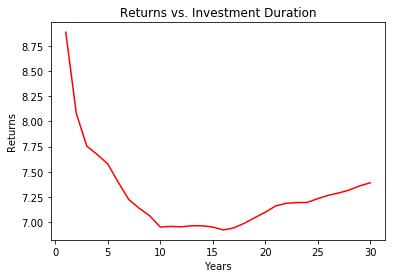

In [113]:
sp500.reset_index()
plt.plot(np.array(sp500['Years']), np.array(sp500['Avg annual return']), color='r')
plt.xlabel('Years')
plt.ylabel('Returns')
plt.title('Returns vs. Investment Duration')
plt.show()

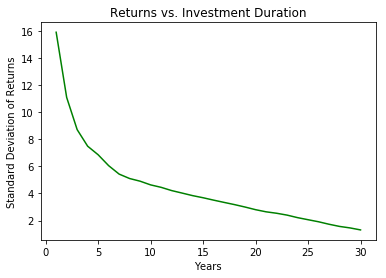

In [114]:
plt.plot(np.array(sp500['Years']), np.array(sp500['Avg annual rsd']), color='g')
plt.xlabel('Years')
plt.ylabel('Standard Deviation of Returns')
plt.title('Returns vs. Investment Duration')
plt.show()

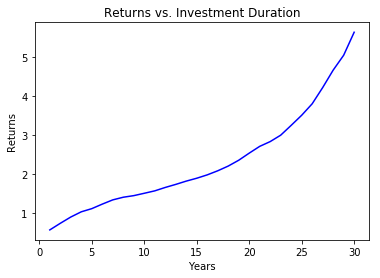

In [115]:
plt.plot(np.array(sp500['Years']), np.array(sp500['Avg annual return']) / np.array(sp500['Avg annual rsd']), color='b')
plt.xlabel('Years')
plt.ylabel('Returns')
plt.title('Returns vs. Investment Duration')
plt.show()